In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


pd.options.display.float_format = '{:,}'.format

In [2]:
def show_diff_stats(filepath1, filepath2):
    data1 = pd.read_csv(filepath1)
    data2 = pd.read_csv(filepath2)
    
    merged_data = pd.merge(data1, data2, on='LICENSE TYPE', suffixes=('_1', '_2'))
    
    # Compute the difference in amounts between the two datasets
    merged_data['count_diff'] = abs(merged_data['Document Count_2'] - merged_data['Document Count_1'])

    # Compute summary statistics on the amount difference
    print(merged_data['count_diff'].describe().loc[['count',"min","50%",'max']])


    # Create a histogram of the amount difference
    sns.histplot(data=merged_data, x='count_diff')
    plt.title("Distribution of document count differences ")
    plt.show()
       

count         8.0
min       5,125.0
50%      54,370.5
max     349,001.0
Name: count_diff, dtype: float64


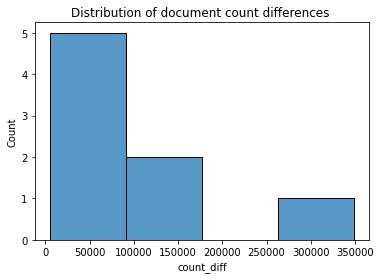

In [3]:
show_diff_stats("./vimeo/data_vimeo_2022_10_29.csv",\
                "./vimeo/data_vimeo_2023_3_14.csv")

count           49.0
min              0.0
50%      2,400,000.0
max     21,000,000.0
Name: count_diff, dtype: float64


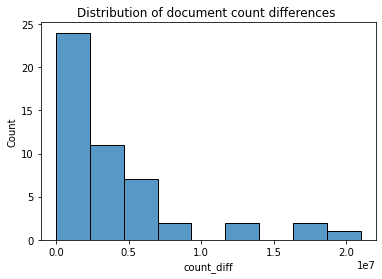

In [4]:
show_diff_stats("./deviantart/data_deviantart_2022_10_30.csv",\
                "./deviantart/data_deviantart_2023_3_14.csv")

In [5]:
def transform_flickr(filepath):
    with open(filepath, 'r') as f1:
        data = json.load(f1)
    total = {}
    for key in data.keys():
        total[key] = data[key][0]["photos"]["total"]
        
    data = pd.DataFrame.from_dict(total, orient='index', columns=['Document Count'])
    data['LICENSE TYPE'] = data.index
    data.reset_index(drop=True, inplace=True)
    
    data = data[['LICENSE TYPE','Document Count']]
    
    return data
    

In [14]:
def get_stats(filepath1, filepath2, data_source, other_col = "Document Count"):
    data1 = pd.read_csv(filepath1)
    data2 = pd.read_csv(filepath2)
    
    merged_data = pd.merge(data1, data2, on='LICENSE TYPE', suffixes=('_1', '_2'))
    
    # Compute the difference in amounts between the two datasets
    merged_data['count_diff'] = abs(merged_data[f'{other_col}_2'] - merged_data[f'{other_col}_1'])

    print(merged_data['count_diff'].describe().loc[["min","50%",'max']])
    
    stats = merged_data['count_diff'].describe().loc[["min","50%",'max']].to_list()
    temp = {data_source: stats}
    df = pd.DataFrame(temp, index=["Min Difference", "Median Difference", "Max Difference"]).T
    
    return df
    
def get_stats_flickr(data1, data2, data_source = "Flickr"):
    
    merged_data = pd.merge(data1, data2, on='LICENSE TYPE', suffixes=('_1', '_2'))
    
    # Compute the difference in amounts between the two datasets
    merged_data['count_diff'] = abs(merged_data['Document Count_2'] - merged_data['Document Count_1'])

    print(merged_data['count_diff'].describe().loc[["min","50%",'max']])
    
    stats = merged_data['count_diff'].describe().loc[["min","50%",'max']].to_list()
    temp = {data_source: stats}
    df = pd.DataFrame(temp, index=["Min Difference", "Median Difference", "Max Difference"]).T
    
    return df
    
    
    

In [15]:
deviantart = get_stats("./deviantart/data_deviantart_2023_3_14.csv",\
                "./deviantart/data_deviantart_2023_3_16.csv", "DeviantArt")

min            0.0
50%    1,400,000.0
max   15,500,000.0
Name: count_diff, dtype: float64


In [16]:
vimeo = get_stats("./vimeo/data_vimeo_2022_10_29.csv",\
                "./vimeo/data_vimeo_2023_3_14.csv", "Vimeo")

min     5,125.0
50%    54,370.5
max   349,001.0
Name: count_diff, dtype: float64


In [17]:
flickr = get_stats_flickr(transform_flickr("flickr/photos_.json"),
                          transform_flickr("flickr/photos.json"))

min    1,817.0
50%    4,677.5
max   23,853.0
Name: count_diff, dtype: float64


In [18]:
internet_archive = get_stats("internetarchive/data_internetarchive_2022_10_20.csv",
                            "internetarchive/data_internetarchive_2023_3_14.csv", data_source="InternetArchive")

min        0.0
50%        0.0
max   12,839.0
Name: count_diff, dtype: float64


In [19]:
wikicommons = get_stats("wikicommons/data_wikicommons_2022_10_21.csv", 
                        "wikicommons/data_wikicommons_2023_3_14.csv", 
                        data_source="Wikicommons",
                       other_col="File Count")

min           0.0
50%           1.0
max   1,081,947.0
Name: count_diff, dtype: float64


In [22]:
summary = pd.concat([wikicommons, flickr, deviantart, internet_archive, vimeo]).sort_values(by = "Max Difference", ascending=False)

In [23]:
summary

,Min Difference,Median Difference,Max Difference
DeviantArt,0.0,"1,400,000.0","15,500,000.0"
Wikicommons,0.0,1.0,"1,081,947.0"
Vimeo,"5,125.0","54,370.5","349,001.0"
Flickr,"1,817.0","4,677.5","23,853.0"
InternetArchive,0.0,0.0,"12,839.0"
